In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)
#[길이,높이,두께]

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [58]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

# **다항특성 만들기**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [60]:
print(train_poly.shape)

(42, 9)


In [61]:
print(train_input.shape)

(42, 3)


In [62]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [63]:
test_poly = poly.transform(test_input)

# **선형회귀모델 훈련**

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9944290458801821
0.9514930708307431


In [65]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

poly.fit([[10,4,5]])
row = poly.transform([[10,4,5]])
print(lr.predict(row))

[144.09283195]


**더 많은 특성 만들기**

In [66]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [67]:
print(train_poly.shape)

(42, 55)


In [68]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#특성이 너무 많아 과대적합되었다.

0.9999999999999942
-2407.5951495267004


# **규제**

과대적합된 모델을 완화해주는 기법을 규제, 또는 정규화라고 한다.

In [80]:
from sklearn.preprocessing import StandardScaler
#규제 전에 표준화 한다.
#사이킥런에서 제공하는 StandardScaler는 제공받은 numpy배열을 표준점수 배열로 반환해준다.
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**릿지 규제**(L2규제)

In [70]:
from sklearn.linear_model import Ridge
#사이킥런에서 제공하는 릿지 규제 모델 Ridge를 사용한다.
#alpha = 1(기본값)
#매개변수 alpha는 Ridge모델의 규제 강도를 설정한다.
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9936596220157639
0.9527371380043742


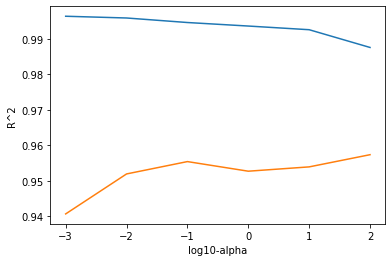

In [71]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
#알파값의 리스트를 만들어 for문으로 최적의 알파값을 찾아낸다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10-alpha')
plt.ylabel('R^2')
plt.show()

In [72]:
#위에서 구한 최적의 알파값인 10^0=1을 적용하여 규제한다.
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9936596220157639
0.9527371380043742


**라쏘 규제**(L1규제)

In [73]:
from sklearn.linear_model import Lasso
#사이킥런에서 제공하는 라쏘 규제 모델 Lasso 사용한다.
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9938179383644384
0.9540095415230517


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8886.825025806456, tolerance: 482.4544399047619
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6050.67592144384, tolerance: 482.4544399047619
  positive)


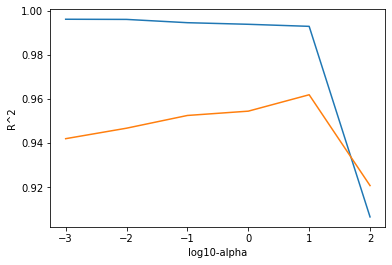

In [74]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10-alpha')
plt.ylabel('R^2')
plt.show()

In [75]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9929360118683732
0.9608163521418741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.5947290732001, tolerance: 482.4544399047619
  positive)


In [76]:
#규제결과 lasso회귀는 과대적합된 모델의 55개의 특성중 45개의 특성을 가중치 0 즉, 사용하지 않았으며
#ridge회귀는 가중치가 0으로 규제된 특성을 두지 않았다.
#하지만 ridge회귀역시 가중치 1이하의 특성을 20개나 둔것을 보아 적절히 규제되었다고 할 수 있다.
print(np.sum(lasso.coef_ == 0))
print(np.sum(ridge.coef_ == 0))
print(np.sum(ridge.coef_ <= 1))

40
0
11


In [81]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit([[10,4,5]])
#모델에 학습시킨 행렬의 형태로 변환
row = poly.transform([[10,4,5]])
#이후 표준화
row = ss.transform(row)
print(ridge.predict(row))

[50.83782098]


# **사이킥런의 변환기 이해**

In [4]:
#degree=2 (기본값)
poly = PolynomialFeatures()
#polynomial features의 fit 메소드는 무언가를 학습하는 메소드가 아니라, 특성의 개수 정도만 파악한다..
poly.fit([[2, 3]])
#transform메소드로 특성값을 만든다.
print(poly.transform([[2, 3]]))
#[1(기본값),2,3,2*2,2*3,3*3]

[[1. 2. 3. 4. 6. 9.]]


In [11]:
#degree -> 주어진 행렬을 몇제곱 할건지 결정
poly = PolynomialFeatures(degree=3)
poly.fit([[2, 3]])
#transform안의 인자가 fit메소드 안의 인자와 달라도, transform안의 인자를 degree만큼 정상적으로 제곱한다.
print(poly.transform([[5, 7]]))
#아래의 주석을 제거하고 실행하면 오류가난다.(fit에서 알려줬던 특성의 개수와 다름)
#print(poly.transform([5, 8, 1]))

[[  1.   5.   7.  25.  35.  49. 125. 175. 245. 343.]]


In [6]:
#include_bias -> 기본값 포함여부를 결정
poly = PolynomialFeatures(include_bias=False)
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]
